## **타이타닉 생존자 예측(분류)**

### 1. 패키지 설치 및 데이터 로드

In [2]:
import pandas as pd
import numpy as np
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


> 종속변수 : Survived

> 독립변수 : Pclass 티켓클래스, Name 이름, Sex 성별, Age 나이, SibSp 함께 탑승한 형제 및 배우자의 수, Parch 함께 탑승한 부모 및 자녀의 수, Ticket 티켓 번호, Embarked 승선한 항구

### 2. 데이터 확인 및 EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [4]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [5]:
data[data.select_dtypes(np.number).columns].corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


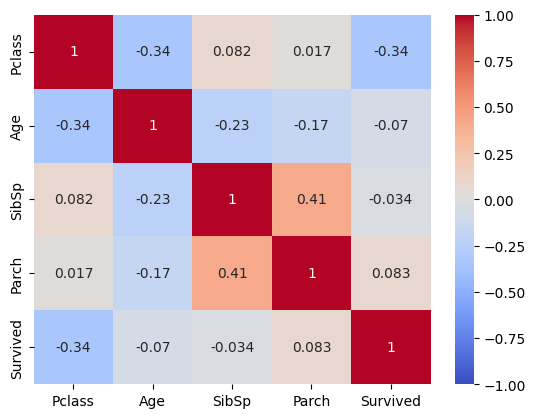

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.heatmap(data[data.select_dtypes(np.number).columns].corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

### 3. 전처리
#### 1) 명목형 변수 
- get_dummies

In [7]:
for cols in list(data.select_dtypes('object').columns):
    print('{0}'.format(cols),data[cols].nunique())

Name 889
Sex 2
Ticket 680
Embarked 3


> 명목형 변수의 unique() 값을 출력해보았다. <br>

> get_dummies가 되면 컬럼의 수가 늘어나는데, 만약에 Name, Ticket 개수만큼 늘어나면 데이터를 관리하기 어려울 것이다. <br>

> 따라서 어떻게 해야할 지 고민할 필요가 있는데, 생존여부에 Name이 미치는 영향력이 작을 것이며, Ticket은 Pclass가 대신할 수 있기 때문에 , Name과 Ticket 컬럼을 삭제하기로 한다. 

In [8]:
data = data.drop(['Name', 'Ticket'], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [9]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data= data.astype(float)
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,1.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,0.0,1.0,0.0,1.0


#### 2) 연속형 변수
- 결측치 처리 및 scaling

In [10]:
data.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Survived      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

> 결측치가 없다

In [11]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452,0.649044,0.086614,0.724409
std,0.834700,12.984932,1.103705,0.806761,0.486260,0.477538,0.281427,0.447063
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000


> Pclass, Age, SibSp의 분포 범위가 크다 -> Scaling 진행

In [16]:
data_num = data[['Pclass', 'Age', 'SibSp']]
data_num.head()

,Pclass,Age,SibSp
0,3.0,22.0,1.0
1,1.0,38.0,1.0
2,3.0,26.0,0.0
3,1.0,35.0,1.0
4,3.0,35.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_scaled = scaler.fit_transform(data_num)
num_scaled

array([[ 0.82520863, -0.56367407,  0.43135024],
       [-1.57221121,  0.66921696,  0.43135024],
       [ 0.82520863, -0.25545131, -0.47519908],
       ...,
       [ 0.82520863, -0.10133993,  0.43135024],
       [-1.57221121, -0.25545131, -0.47519908],
       [ 0.82520863,  0.20688282, -0.47519908]])

In [20]:
df_num_scaled = pd.DataFrame(num_scaled, columns=['Pclass', 'Age', 'SibSp'])
df_num_scaled.head()

,Pclass,Age,SibSp
0,0.825209,-0.563674,0.431350
1,-1.572211,0.669217,0.431350
2,0.825209,-0.255451,-0.475199
3,-1.572211,0.438050,0.431350
4,0.825209,0.438050,-0.475199


#### 3) 합치기

In [26]:
df_dummies = data[data.columns.difference(df_num_scaled.columns)]
df_dummies

,Embarked_Q,Embarked_S,Parch,Sex_male,Survived
0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
884,0.0,1.0,0.0,1.0,0.0
885,0.0,1.0,0.0,0.0,1.0
886,0.0,1.0,2.0,0.0,0.0
887,0.0,0.0,0.0,1.0,1.0


In [28]:
final_data = pd.concat([df_num_scaled,df_dummies], axis=1)
final_data.head()

,Pclass,Age,SibSp,Embarked_Q,Embarked_S,Parch,Sex_male,Survived
0,0.825209,-0.563674,0.431350,0.0,1.0,0.0,1.0,0.0
1,-1.572211,0.669217,0.431350,0.0,0.0,0.0,0.0,1.0
2,0.825209,-0.255451,-0.475199,0.0,1.0,0.0,0.0,1.0
3,-1.572211,0.438050,0.431350,0.0,1.0,0.0,0.0,1.0
4,0.825209,0.438050,-0.475199,0.0,1.0,0.0,1.0,0.0


### 4. 모델링

#### 1) train, test 분리

In [31]:
X = final_data.drop('Survived', axis=1)
y = final_data[['Survived']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(622, 7) (622, 1)
(267, 7) (267, 1)


#### 2) logistic regression 객체 생성 및 학습

In [32]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

pred = logit.predict(X_test)
pred

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0.

#### 3) 모델 평가

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8014981273408239

> 80% 맞춤

In [36]:
list(zip(X_train.columns, logit.coef_[0]))

[('Pclass', -0.9292101234359705),
 ('Age', -0.5164647340526958),
 ('SibSp', -0.4213900823875899),
 ('Embarked_Q', -0.18238601944347427),
 ('Embarked_S', -0.5940962778128507),
 ('Parch', -0.02425913039875787),
 ('Sex_male', -2.621350975377441)]

> Pclass가 높을수록 생존가능성이 낮다. <br>
> Age가 높을수록 생존가능성이 낮다. <br>
> SibSp 동선자가 많을수록 생존가능성이 낮다. <br>
> 목적지가 Embarked_Q 일수록 다른 목적지에 비해 생존가능성이 높다. <br>
> Parch 동선자가 많을수록 생존가능성이 높다(다른 변수들에 비해서) <br>
> 남자일수록 생존가능성이 낮다.